## Lab 3 Report

Hsuan-Chung Hung, Scott Lin, Charles Tung Fang

In [38]:
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.io import wavfile as wav
from scipy import signal as sig
import simpleaudio as sa
import decimal
import csv

## Summary

This lab a series of exercises to implement convolution on the computer to measure the similarity between two signals. There are 3 assignments done in this lab: Matched Filter with Ideal Signals, Signal Decoding with a Matched Filter, Decipher Received Message.

## Assignment 1 --  Matched Filter with Ideal Signals

<IPython.core.display.Javascript object>


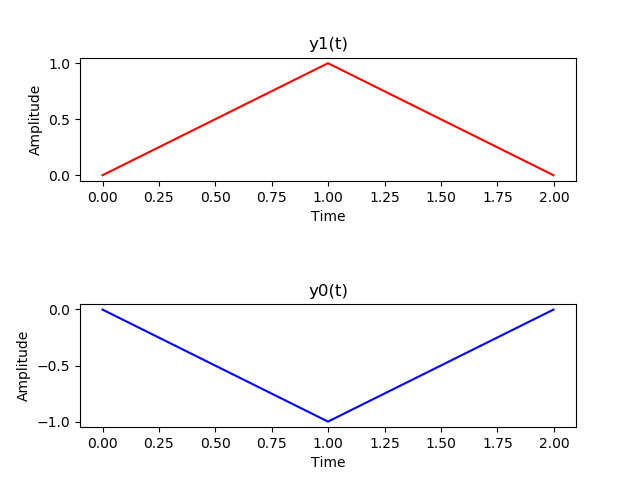

0.999 -0.999


In [39]:
# Assignment 1 - Matched Filter with Ideal Signals

#Part A
fs = 1000
t = np.arange(0, 1, 1/fs)

s1 = np.subtract(np.heaviside(t, 1), np.heaviside(t - 1, 1))
s0 = -s1

#Part B
y1 = np.convolve(s1, s1)/fs
y0 = np.convolve(s1, s0)/fs

#Part C
t_y = np.arange(0, len(y1), 1) * (1 / fs)

fig = plt.figure(1)
fig.subplots_adjust(hspace = 1, wspace = 0.7)

plt.subplot(2, 1, 1)
plt.plot(t_y, y1, color = 'r')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.title('y1(t)')



plt.subplot(2, 1, 2)
plt.plot(t_y, y0, color = 'b')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.title('y0(t)')
plt.show()

#Part D
y1_corr = y1[len(s1)]
y2_corr = y0[len(s1)]
print(y1_corr, y2_corr)

###  Discussion

The correlation measurement will be less as the new y0-corr will become 0, the original s0 will be more useful communication because the new correlation of y0 is zero 

<IPython.core.display.Javascript object>


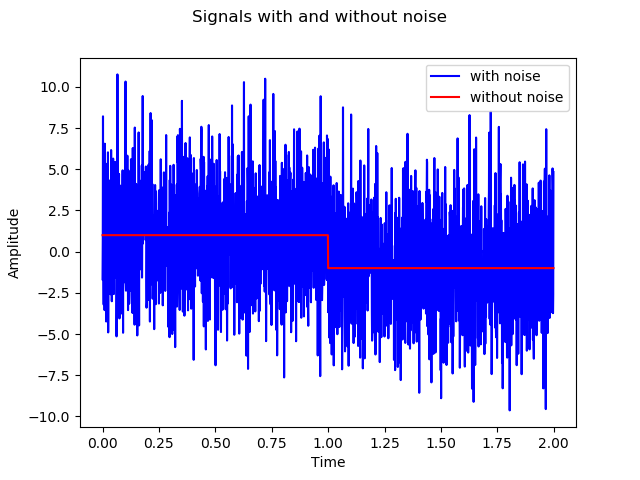

<IPython.core.display.Javascript object>


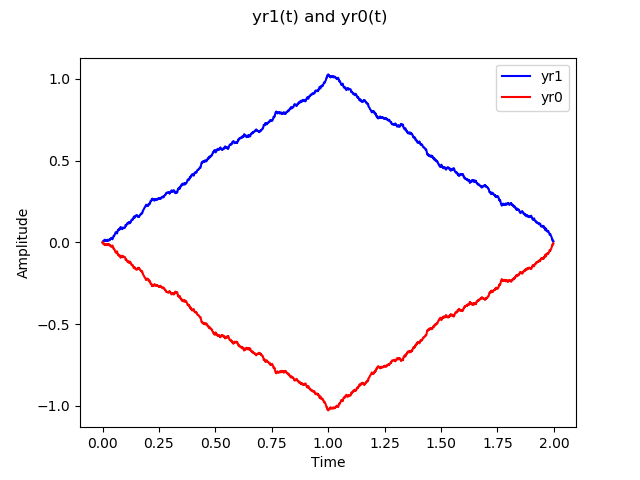

1.0277459794346728 -1.0277459794346728
1 0


In [40]:
# Assignment 2 - Signal Decoding with a Matched Filter

#Part A
def decode(r, fs, s1, s0):
    y1 = np.convolve(r, s1)/fs
    y0 = np.convolve(r, s0)/fs
    y1_corr = y1[len(s1)]
    y0_corr = y0[len(s0)]
    if(y0_corr >= y1_corr):
        s = "0"
    else:
        s = "1"
    return s

#Part B
n = np.random.normal(0, 3, len(s1))
r = s1 + n
r0 = s0 + n
s2 = np.concatenate([s1, s0])
r2 = np.concatenate([r, r0])
t = np.arange(0, len(s2), 1)/fs

fig = plt.figure(2)

plt.plot(t, r2, label = 'with noise', color = 'b')
plt.plot(t, s2, label = 'without noise', color = 'r')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.suptitle("Signals with and without noise")
plt.legend()
plt.show()

#Part C
yr1 = np.convolve(r, s1)/fs
yr0 = np.convolve(r, s0)/fs
t_yr = t = np.arange(0, len(yr1), 1)/fs

fig = plt.figure(3)

plt.plot(t_yr, yr1, label = 'yr1', color = 'b')
plt.plot(t_yr, yr0, label = 'yr0', color = 'r')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.suptitle("yr1(t) and yr0(t)")
plt.legend()
plt.show()

yr1_corr = yr1[len(s1)]
yr0_corr = yr0[len(s0)]
print(yr1_corr, yr0_corr)

#Part D
k1 = decode(s1 + n, fs, s1, s0)
k2 = decode(s0 + n, fs, s1, s0)
print(k1, k2)

###  Discussion

The influence of the noise will be more obvious if the signal is only 20ms long

In [41]:
# Assignment 3 -  Decipher Received Message

#Part A
fs = 8000
t = np.arange(0, 1, 1/fs)
s1 = np.subtract(np.heaviside(t, 1), np.heaviside(t - 1, 1))
s0 = -s1

#Part B
file = open('receivedmsg.csv', 'rb')
rm = np.loadtxt(file, delimiter=',')
array = np.arange(0, rm.shape[0])
for i in range(0,rm.shape[0]):
    k = decode(rm[i], fs, s1, s0)
    array[i] = k

#Part C    
print(array)

[0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0
 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1
 1 1 0 0 1 1 0 0 1 0 0 0 0 1]


###  Discussion

Go Huskies!